In [1]:
!pip install --quiet matplotlib scikit-learn six

In [2]:
import matplotlib.pyplot as plt # Graph things.
import numpy as np # Optimized version of arrays which allows to use multi-dimensional calculations and shapes in arrays.
import pandas as pd # Data analytics and manipulation libraries and tools.
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
from six.moves import urllib

# Core Learning Algorithms using TensorFlow
We are gonna use some core algorithms using TensorFlow, including:
- Linear regression
- Classification
- Clustering
- Hidden Markov Models

In [3]:
# Load data.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # Training data.
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # Testing data.
y_train = dftrain.pop('survived') # Saving only "survived" column into y_train.
y_eval = dfeval.pop('survived')

In [16]:
dftrain.describe() # Give us some statistics about the numeric columns in the dataset:

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [17]:
dftrain.shape # We have 627 rows and 9 columns:

(627, 9)

In [18]:
dfeval.head() # Get the first 5 rows in the data frame:

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


#### We have brought the data, now, let's make the magics and get statistics:

<Axes: >

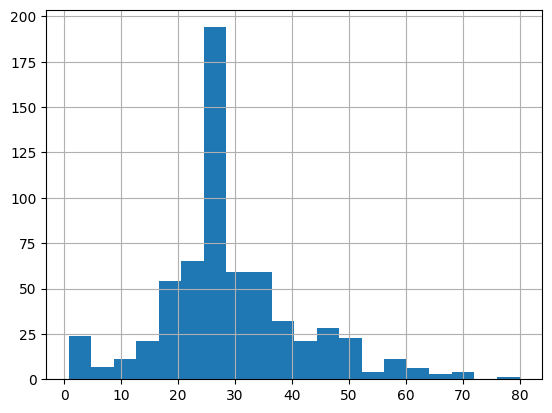

In [22]:
dftrain.age.hist(bins=20) # Make some statistics about a field (y = n. of people, x = their age).

<Axes: ylabel='sex'>

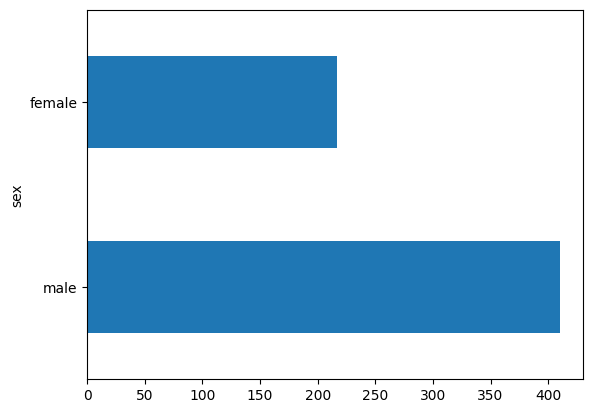

In [26]:
dftrain.sex.value_counts().plot(kind = "barh")

<Axes: ylabel='class'>

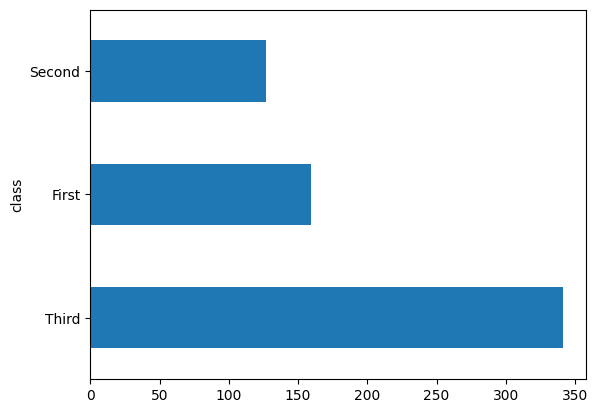

In [30]:
dftrain["class"].value_counts().plot(kind = "barh") # People by class.

Text(0.5, 0, '% Survive')

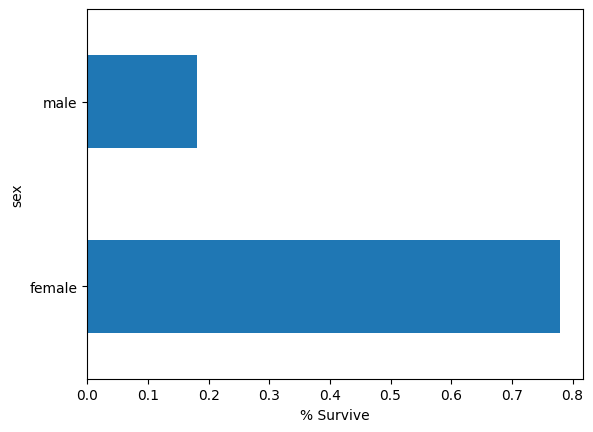

In [32]:
pd.concat([dftrain, y_train], axis = 1).groupby('sex').survived.mean().plot(kind = "barh").set_xlabel('% Survive')

### What information says:
- The majority of passengers are in their 20's or 30's.
- The majority of passengers are male.
- The majority of passengers are in "Third" class.
- Females have a much bigger chance of survival.

## Linear regression
Is one of the most basic forms of machine learning and **is used to predict numeric values.** The next example will use the linear model (like _y = mx + b_) to predict the survival rate of passengers from the titanic dataset. Example taken from: https://www.tensorflow.org/tutorials/estimator/linear

**Next, we are gonna train it to predict some results (who's gonna survive):**